In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog
    
#Custom Classes
    #FeatureExtractorUtil.py
    #Classifier.py

from utils.FeatureExtractorUtil import FeatureExtractorUtil 
from utils.Classifier import Classifier

In [2]:
#import os

#dirName = "vehicles/GTI_Right"

#for i, filename in enumerate(os.listdir(dirName)):
#    if(i==0):
#        continue;
#    print(i,filename)
#    os.rename(dirName+"/"+filename,dirName+"/r-"+filename)
#    i+=1

In [3]:
featureExtractorUtil = FeatureExtractorUtil()
classifier = Classifier()

In [4]:
tot_notcar_images = []

notcarsExtras = glob.glob("non-vehicles/Extras/extra*")
notcarsGTI = glob.glob("non-vehicles/GTI/image*")

for ncarExt in notcarsExtras:
    tot_notcar_images.append(ncarExt)

for ncarsGTI in notcarsGTI:
    tot_notcar_images.append(ncarsGTI) 


tot_car_images = []

cars_GTIFolders = glob.glob("vehicles/GTI*")
for carsFolder in cars_GTIFolders:
    carsImages = glob.glob(carsFolder+"/*image*")
    for car in carsImages:
        tot_car_images.append(car)

cars_KITTI_extracted_folders = glob.glob("vehicles/KITTI_extracted/*")

for carsImages in cars_KITTI_extracted_folders:
    tot_car_images.append(car)
        
print("Total Car Images -->",len(tot_car_images))
print("Total Non Car Images -->",len(tot_notcar_images))

Total Car Images --> 8792
Total Non Car Images --> 8968


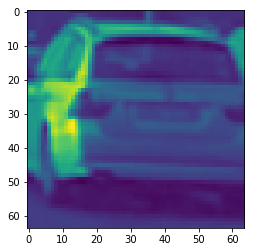

In [5]:
ind = np.random.randint(0, len(tot_car_images))
samplecar = mpimg.imread(tot_car_images[ind])
gray = cv2.cvtColor(samplecar, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

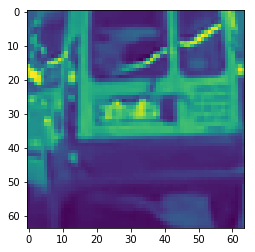

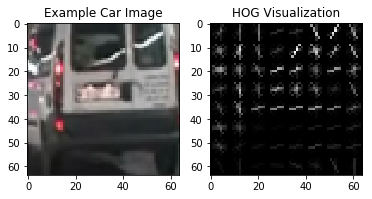

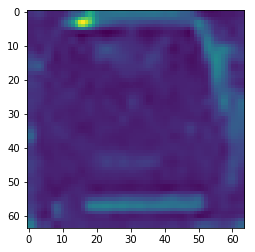

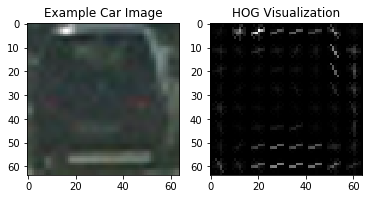

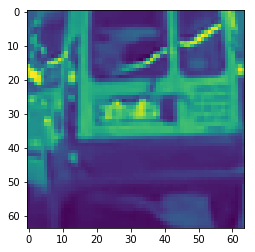

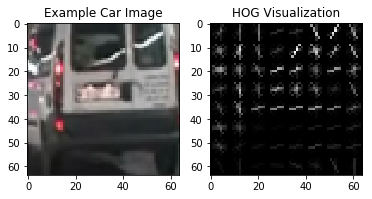

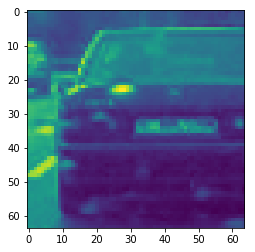

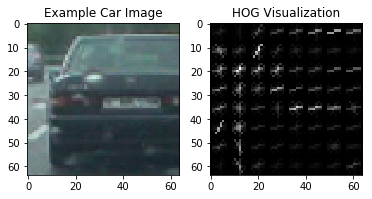

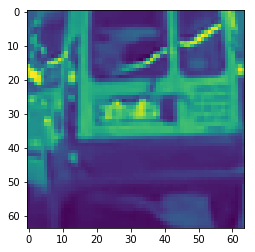

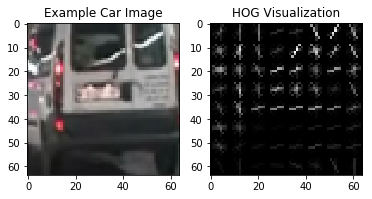

In [6]:
from skimage.feature import hog

orient = 9
pix_per_cell = 8
cell_per_block = 2

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        # Use skimage.hog() to get both features and a visualization
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=False, feature_vector=False)
    return features


n=5
for counter in range(1,n+1): 
    ind = np.random.randint(0, len(tot_car_images))
    samplecar = mpimg.imread(tot_car_images[ind])
    gray = cv2.cvtColor(samplecar, cv2.COLOR_RGB2GRAY)
    plt.imshow(gray)
    plt.show()
    features, hog_image = get_hog_features(gray, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=False)

    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(samplecar, cmap='gray')
    plt.title('Example Car Image')
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.show()

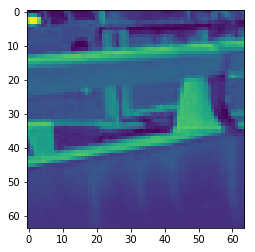

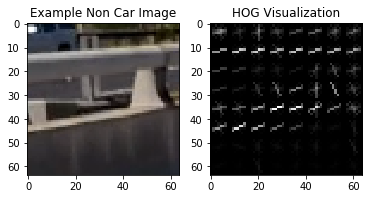

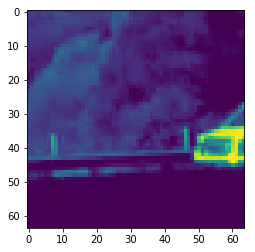

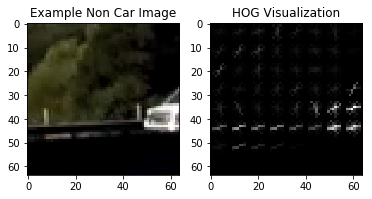

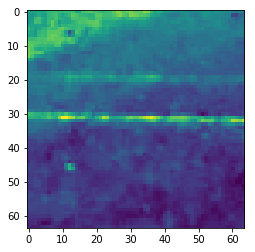

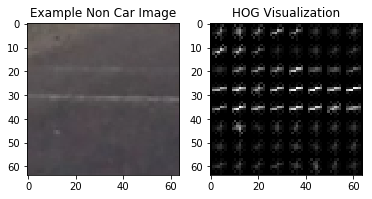

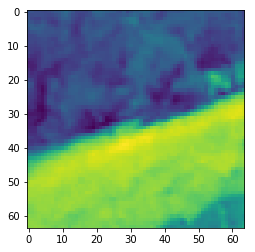

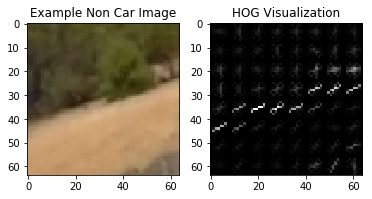

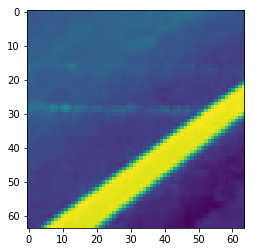

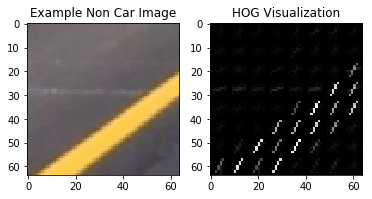

In [8]:
n=5
for counter in range(1,n+1): 
    ind = np.random.randint(0, len(tot_notcar_images))
    samplenoncar = mpimg.imread(tot_notcar_images[ind])
    nongray = cv2.cvtColor(samplenoncar, cv2.COLOR_RGB2GRAY)
    plt.imshow(nongray)
    plt.show()

    features, hog_image = get_hog_features(nongray, orient, 
                                pix_per_cell, cell_per_block, 
                                vis=True, feature_vec=False)

    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(samplenoncar, cmap='gray')
    plt.title('Example Non Car Image')
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Visualization')
    plt.show()

In [30]:
#Shuffling the Images Data
from sklearn.utils import shuffle
tot_car_images = shuffle(tot_car_images, random_state=20)

In [31]:
tot_notcar_images = shuffle(tot_notcar_images, random_state=20)

In [32]:
print("After Shuffle - Total Car Images -->",len(tot_car_images))
print("After Shuffle - Total Non Car Images -->",len(tot_notcar_images))

After Shuffle - Total Car Images --> 8792
After Shuffle - Total Non Car Images --> 8968


In [33]:
### TODO: Tweak these parameters and see how the results change.
rcolor_space='YCrCb'
spatial_size=(32, 32)
hist_bins=32
orient=9
pix_per_cell=8
cell_per_block=2
hog_channel='ALL'
spatial_feat=True
hist_feat=True
hog_feat=True

In [34]:
car_features = featureExtractorUtil.extract_features(tot_car_images, rcolor_space, 
                        spatial_size, hist_bins, 
                        orient, pix_per_cell, 
                        cell_per_block,hog_channel, spatial_feat,hist_feat, hog_feat)

notcar_features = featureExtractorUtil.extract_features(tot_notcar_images, rcolor_space, 
                        spatial_size, hist_bins, 
                        orient, pix_per_cell, 
                        cell_per_block, 
                        hog_channel, spatial_feat, 
                        hist_feat, hog_feat)

color_space--> YCrCb
color_space--> YCrCb


In [38]:
X_scaler, scaled_X, labels_vector = classifier.standardize(car_features,notcar_features)

In [39]:
X_train, X_test, y_train, y_test = classifier.train_test_split(scaled_X, labels_vector)

In [40]:
print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')

Using: 9 orientations 8 pixels per cell and 2 cells per block


In [41]:
print('Feature vector length:', len(X_train[0]))

Feature vector length: 8460


In [42]:
svc, svc_Score = classifier.SVC_Normalize(X_train,y_train, X_test,y_test)

4.08 Seconds to train SVC...
Test Accuracy of SVC =  0.993


In [43]:
print('svc, svc_Score:', svc, svc_Score)

svc, svc_Score: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) 0.993


In [44]:
#Create a dump file to store all values

import pickle

data={
    'svc': svc,
    'X_scaler': X_scaler,
    'color_space': rcolor_space,
    'orient': orient,
    'pix_per_cell': pix_per_cell,
    'cell_per_block': cell_per_block,
    'spatial_size' : spatial_size,
    'hist_bins': hist_bins,
    'hog_channel': hog_channel
     }

with open('model-params.pk', 'wb') as pFile:
    pickle.dump(data, pFile)
    

In [45]:
import pickle
# Read from Dump file for all values
dist_pickle = pickle.load( open("model-params.pk", "rb" ) )
svc = dist_pickle["svc"]
print("svc-->",svc)
X_scaler = dist_pickle["X_scaler"]
color_space = dist_pickle["color_space"]
orient = dist_pickle["orient"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]



svc--> LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


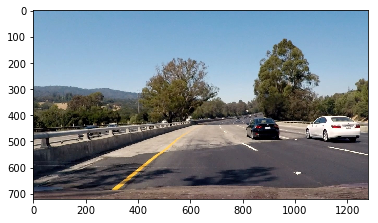

In [46]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
from skimage.feature import hog

image = mpimg.imread('CarND-Vehicle-Detection/test_images/test4.jpg')
draw_image = np.copy(image)
plt.imshow(draw_image)
plt.show()

In [47]:
from utils.ApplyClassifier import ApplyClassifier
applyClassifier = ApplyClassifier()

svc--> LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


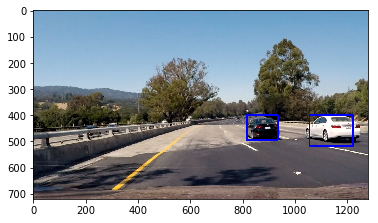

In [48]:
out_img,boxes = applyClassifier.find_cars(draw_image,True)
plt.imshow(out_img)
plt.show()

In [49]:
from utils.Smoothening import Smoothening
smoothening = Smoothening()

heat = np.zeros_like(draw_image[:,:,0]).astype(np.float)


In [50]:
# Add heat to each box in box list
heat = smoothening.add_heat(heat,boxes)

In [51]:
# Apply threshold to help remove false positives
heat = smoothening.apply_threshold(heat,1)
# Visualize the heatmap when displaying    
heatmap = np.clip(heat, 0, 255)

In [52]:
# Find final boxes from heatmap using label function
from scipy.ndimage.measurements import label

labels = label(heatmap)
draw_img = smoothening.draw_labeled_bboxes(np.copy(image), labels)

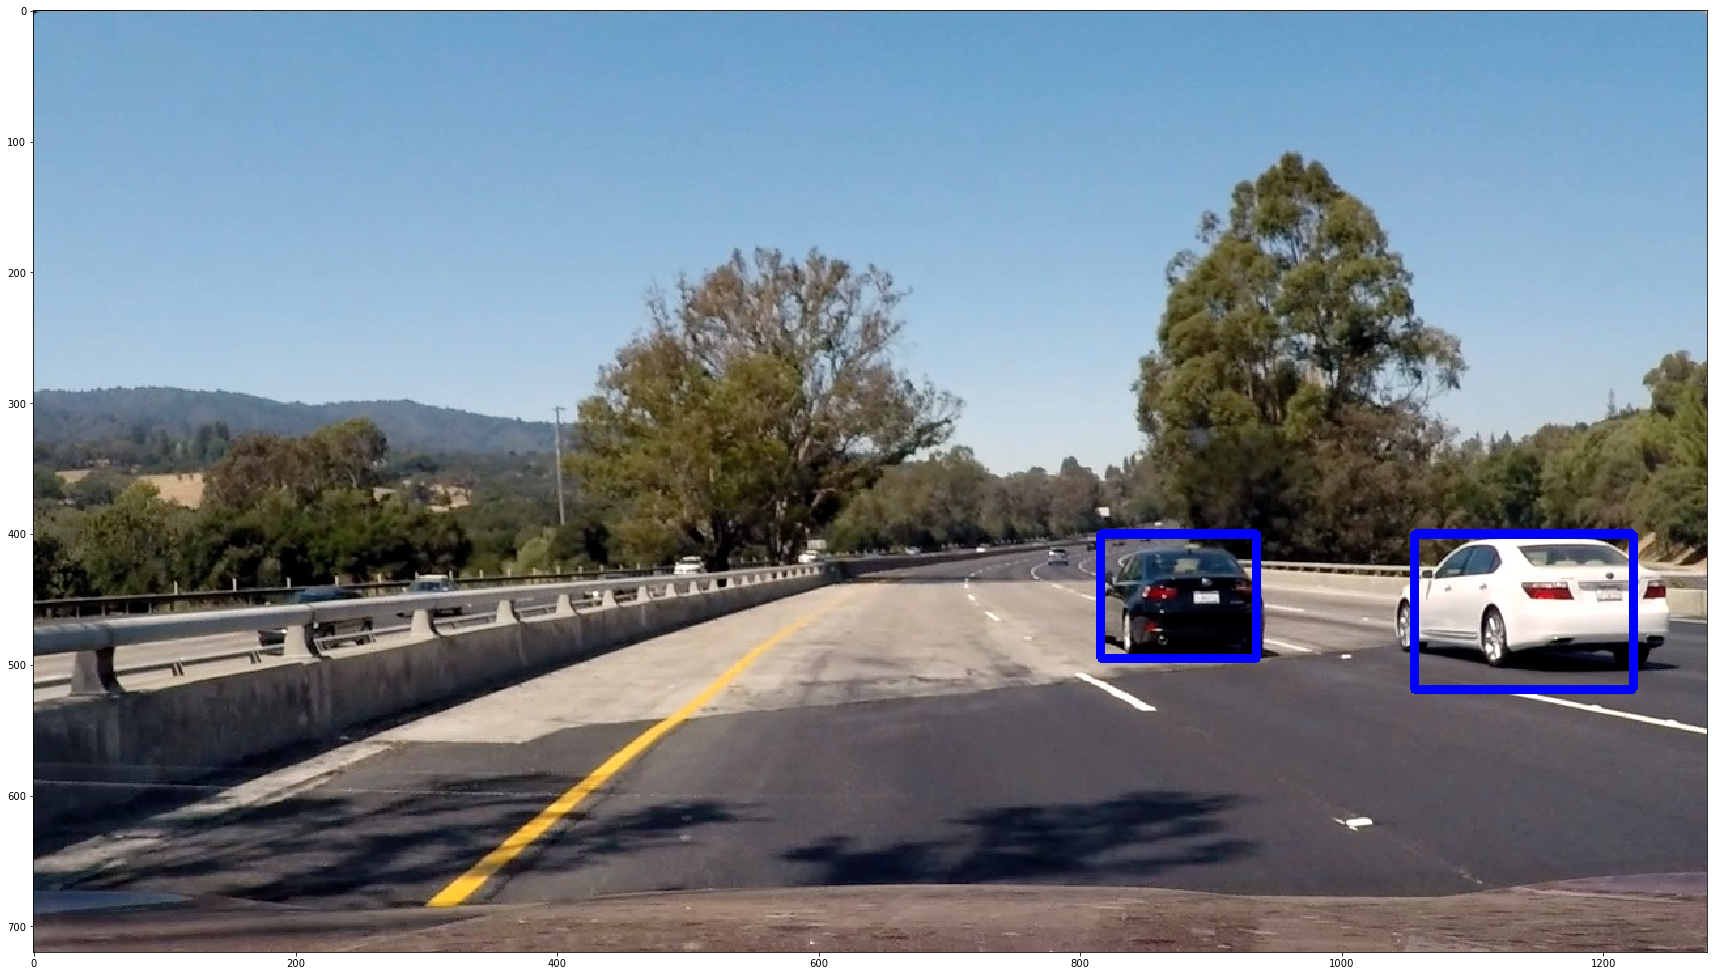

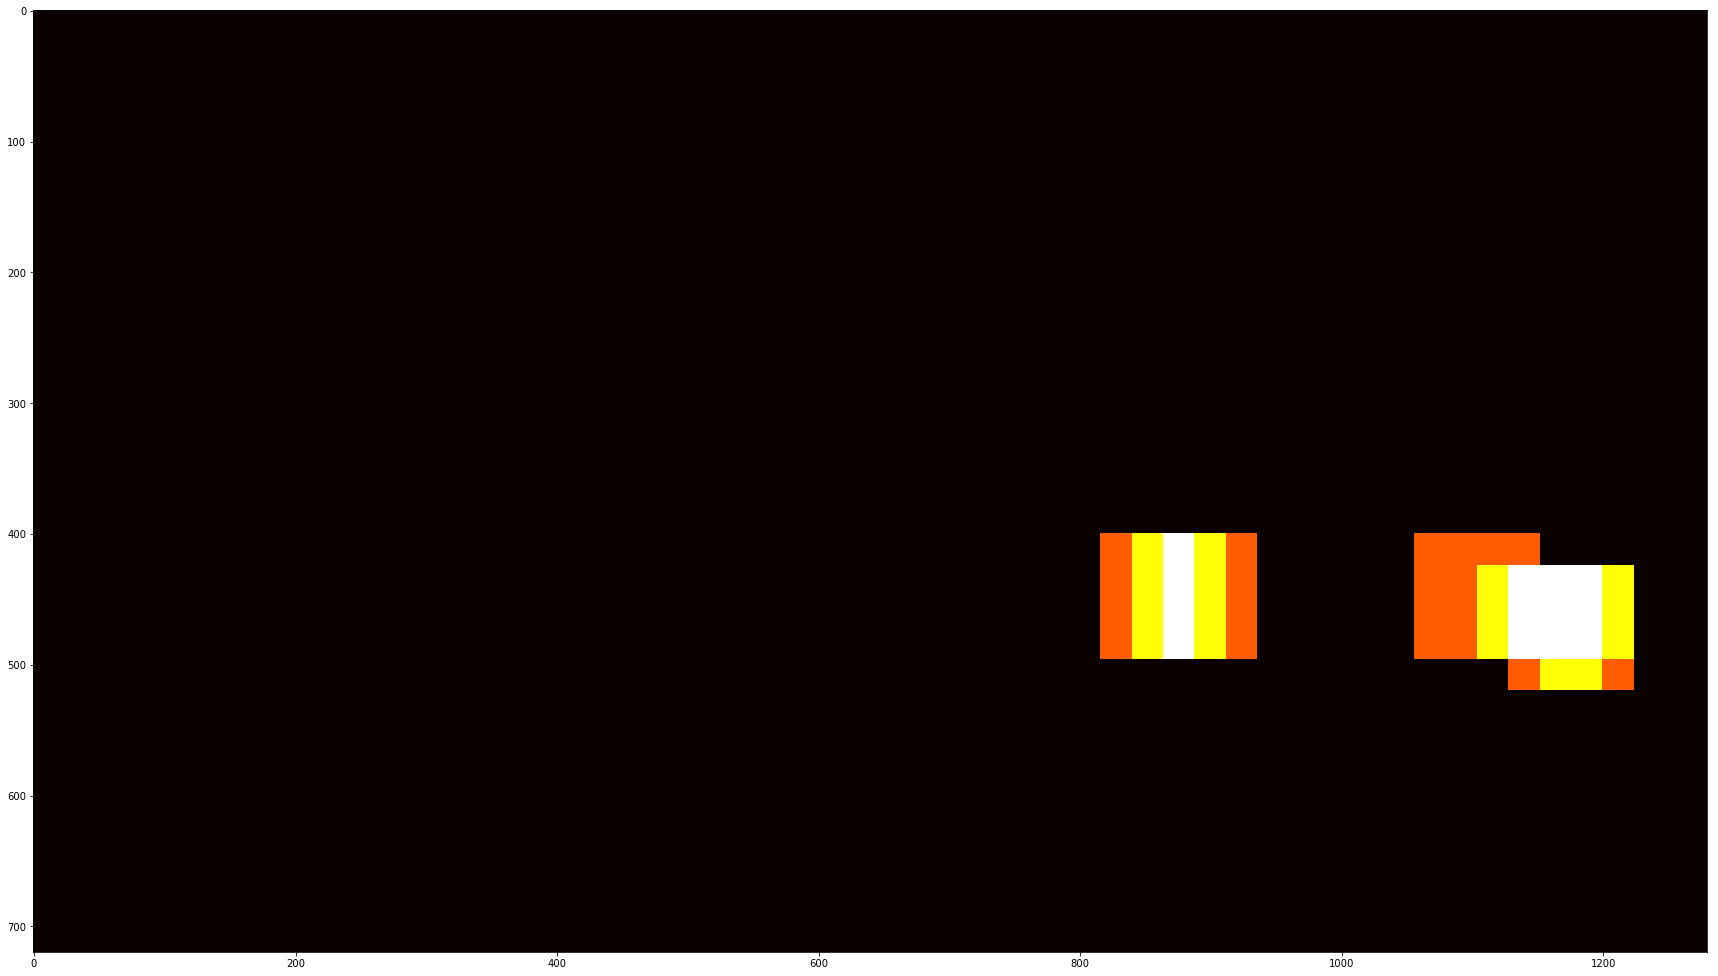

In [53]:
plt.figure(figsize=(30,30))
plt.imshow(draw_img)
plt.show()

plt.figure(figsize=(30,30))
plt.imshow(heatmap, cmap='hot')
plt.show()

In [54]:
test_for_plot = glob.glob("CarND-Vehicle-Detection/test_images/test*")

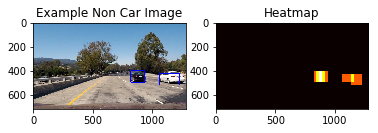

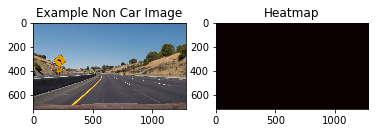

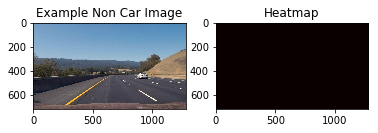

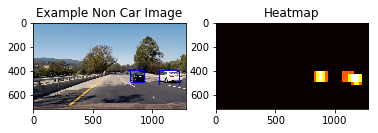

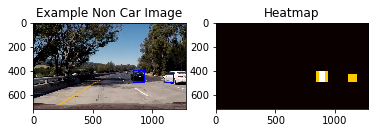

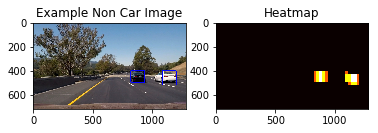

In [57]:
for test_img in test_for_plot:
    draw_image = mpimg.imread(test_img)
    out_img,boxes = applyClassifier.find_cars(draw_image,True)
    heat = np.zeros_like(draw_image[:,:,0]).astype(np.float)
    heat = smoothening.add_heat(heat,boxes)
    heat = smoothening.apply_threshold(heat,1)
    heatmap = np.clip(heat, 0, 255)
    labels = label(heatmap)
    draw_img = smoothening.draw_labeled_bboxes(np.copy(draw_image), labels)
    # Plot the examples
    fig = plt.figure()
    plt.subplot(121)
    plt.imshow(draw_img, cmap='gray')
    plt.title('Example Non Car Image')
    plt.subplot(122)
    plt.imshow(heatmap, cmap='hot')
    plt.title('Heatmap')
    plt.show()

In [56]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

white_output = 'output_final_project_ver_final.mp4'
clip = VideoFileClip("project_video.mp4")#.subclip(t_start=30,t_end=35)
white_clip = clip.fl_image(applyClassifier.find_cars)
%time white_clip.write_videofile(white_output, audio=False)


[MoviePy] >>>> Building video output_final_project_ver_final.mp4
[MoviePy] Writing video output_final_project_ver_final.mp4


100%|█████████▉| 1260/1261 [07:38<00:00,  2.80it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_final_project_ver_final.mp4 

CPU times: user 7min 23s, sys: 19.6 s, total: 7min 42s
Wall time: 7min 39s
